### Setup

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None, 'display.max_rows', 100) 

from os import path
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno
import pandas_profiling

import datetime
import dateutil

### Import

In [5]:
# Initial load with read_csv. Future imports should utilize pickle file created below.

d = '../data/raw'
f = 'loan.csv'

date_cols = [15, 26, 45, 47, 48]
col_type_dict = {'acc_now_delinq': 'float64',
                 'addr_state': 'O',
                 'all_util': 'float64',
                 'annual_inc': 'float64',
                 'annual_inc_joint': 'float64',
                 'application_type': 'O',
                 'collection_recovery_fee': 'float64',
                 'collections_12_mths_ex_med': 'float64',
                 'delinq_2yrs': 'float64',
                 'desc': 'O',
                 'dti': 'float64',
                 'dti_joint': 'float64',
                 'emp_length': 'O',
                 'emp_title': 'O',
                 'funded_amnt': 'float64',
                 'funded_amnt_inv': 'float64',
                 'grade': 'O',
                 'home_ownership': 'O',
                 'id': 'int64',
                 'il_util': 'float64',
                 'initial_list_status': 'O',
                 'inq_fi': 'float64',
                 'inq_last_12m': 'float64',
                 'inq_last_6mths': 'float64',
                 'installment': 'float64',
                 'int_rate': 'float64',
                 'last_pymnt_amnt': 'float64',
                 'loan_amnt': 'float64',
                 'loan_status': 'O',
                 'max_bal_bc': 'float64',
                 'member_id': 'int64',
                 'mths_since_last_delinq': 'float64',
                 'mths_since_last_major_derog': 'float64',
                 'mths_since_last_record': 'float64',
                 'mths_since_rcnt_il': 'float64',
                 'open_acc': 'float64',
                 'open_acc_6m': 'float64',
                 'open_il_12m': 'float64',
                 'open_il_24m': 'float64',
                 'open_il_6m': 'float64',
                 'open_rv_12m': 'float64',
                 'open_rv_24m': 'float64',
                 'out_prncp': 'float64',
                 'out_prncp_inv': 'float64',
                 'policy_code': 'float64',
                 'pub_rec': 'float64',
                 'purpose': 'O',
                 'pymnt_plan': 'O',
                 'recoveries': 'float64',
                 'revol_bal': 'float64',
                 'revol_util': 'float64',
                 'sub_grade': 'O',
                 'term': 'O',
                 'title': 'O',
                 'tot_coll_amt': 'float64',
                 'tot_cur_bal': 'float64',
                 'total_acc': 'float64',
                 'total_bal_il': 'float64',
                 'total_cu_tl': 'float64',
                 'total_pymnt': 'float64',
                 'total_pymnt_inv': 'float64',
                 'total_rec_int': 'float64',
                 'total_rec_late_fee': 'float64',
                 'total_rec_prncp': 'float64',
                 'total_rev_hi_lim': 'float64',
                 'url': 'O',
                 'verification_status': 'O',
                 'verification_status_joint': 'O',
                 'zip_code': 'O'}

data_raw = pd.read_csv(path.join(d,f), parse_dates=date_cols, dtype=col_type_dict)

In [6]:
# Create pickle file for raw data

f = 'loan.p'
d = '../data/raw'
fp = path.join(d,f)

with open(fp, 'wb') as file:
    pickle.dump(data_raw, file)

In [77]:
# Open pickle file with raw data

f = 'loan.p'
d = '../data/raw'
fp = path.join(d,f)

with open(fp, 'rb') as file:
    data = pickle.load(file)

In [8]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null datetime64[ns]
loan_status  

In [10]:
data.shape

(887379, 74)

In [11]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

In [12]:
data.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint
count,887379,887379,887379,835922,887379,887379,887379,887379,887379,887379,126029,887379,887228,887379,887379,887379,887379,511
unique,2,7,35,299272,12,6,3,10,2,887379,124470,14,63145,935,51,2,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,601779,887369,1,246,524215,414001,9770,129517,456848,886868,283


In [13]:
data.describe(include=['datetime'])

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,887379,887350,869720,634408,887326
unique,103,697,98,100,103
top,2015-10-01 00:00:00,2001-08-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00
freq,48631,6659,470150,553406,730574
first,2007-06-01 00:00:00,1944-01-01 00:00:00,2007-12-01 00:00:00,2007-12-01 00:00:00,2007-05-01 00:00:00
last,2015-12-01 00:00:00,2012-11-01 00:00:00,2016-01-01 00:00:00,2016-03-01 00:00:00,2016-01-01 00:00:00


### Attribute Info

##### Borrower Info
- addr_state: The state provided by the borrower in the loan application (categorical: 2 char state code)
- annual_inc: The self-reported annual income provided by the borrower during registration (numeric)
- annual_inc_joint: The combined self-reported annual income provided by the co-borrowers during registration (numeric)
- emp_length: Employment length in years (categorical: '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years' , '9 years', '10+ years')
- emp_title: The job title supplied by the Borrower when applying for the loan (text)
- home_ownership: The home ownership status provided by the borrower during registration. (categorical: 'RENT', 'OWN', 'MORTGAGE', 'OTHER')
- verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified (categorical: 'Verified', 'Source Verified', 'Not Verified')
- member_id: A unique LC assigned Id for the borrower member (numeric)
- verification_status_joint: Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified (categorical: 'NaN', 'Verified', 'Source Verified', 'Not Verified')
- zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application (categorical: '\[0-9\]\{3\}xx')

##### Loan Info
- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers (categorical: 'INDIVIDUAL', 'JOINT')
- collection_recovery_fee: Post charge off collection fee (numeric)
- desc: Loan description provided by the borrower (text)
- grade: LC assigned loan grade (categorical: 'A',' B', 'C', 'D', 'E', 'F', 'G']
- id: A unique LC assigned ID for the loan listing (numeric)
- initial_list_status: The initial listing status of the loan (categorical: 'W', 'F')
- issue_d: The month which the loan was funded (date: Mon-Year)
- last_credit_pull_d: The most recent month LC pulled credit for this loan (date: Mon-Year)
- loan_status: Current status of the loan (categorical: 'Fully Paid', 'Charged Off', 'Current', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off', 'Issued')
- policy_code: publicly available policy_code=1; new products not publicly available policy_code=2 (categorical: '1', '2')
- purpose: A category provided by the borrower for the loan request (categorical: 'credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy', 'educational')
- sub_grade: LC assigned loan subgrade (categorical: '\[A-G\]\[1-5\]')
- title: The loan title provided by the borrower (text)
- url: URL for the LC page with listing data

##### Loan Finances
- funded_amnt: The total amount committed to that loan at that point in time (numeric)
- funded_amnt_inv: The total amount committed by investors for that loan at that point in time. (numeric)
- installment: The monthly payment owed by the borrower if the loan originates (numeric)
- int_rate:	Interest Rate on the loan (numeric)
- last_pymnt_amnt: Last total payment amount received (numeric)
- last_pymnt_d:	Last month payment was received (date: Mon-Year)
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value (numeric)
- next_pymnt_d:	Next scheduled payment date (date: Mon-Year)
- out_prncp: Remaining outstanding principal for total amount funded (numeric)
- out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors (numeric)
- pymnt_plan: Indicates if a payment plan has been put in place for the loan (categorical: 'y', 'n')
- recoveries: post charge-off gross recovery (numeric)
- term: The number of payments on the loan. Values are in months and can be either 36 or 60 (categorical: '36', '60')
- total_pymnt: Payments received to date for total amount funded (numeric)
- total_pymnt_inv: Payments received to date for portion of total amount funded by investors (numeric)
- total_rec_int: Interest received to date (numeric)
- total_rec_late_fee: Late fees received to date (numeric)
- total_rec_prncp: Principal received to date (numeric)

##### Borrower Credit History
- collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections (numeric)
- delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years (numeric)
- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage  and the requested LC loan, divided by the borrower’s self-reported monthly income. (numeric)
- dti_joint: A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income (numeric)
- earliest_cr_line:	The month the borrower's earliest reported credit line was opened (date: Mon-Year)
- fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to (MISSING)
- fico_range_low: The lower boundary range the borrower’s FICO at loan origination belongs to (MISSING)
- inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries) (numeric)
- last_fico_range_high	The upper boundary range the borrower’s last FICO pulled belongs to (MISSING)
- last_fico_range_low	The lower boundary range the borrower’s last FICO pulled belongs to (MISSING)
- mths_since_last_delinq: The number of months since the borrower's last delinquency (numeric)
- mths_since_last_major_derog: Months since most recent 90-day or worse rating (numeric)
- mths_since_last_record: The number of months since the last public record (numeric)
- open_acc:	The number of open credit lines in the borrower's credit file. (numeric)
- pub_rec: Number of derogatory public records (numeric)
- revol_bal: Total credit revolving balance (numeric)
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit (numeric)
- total_acc: The total number of credit lines currently in the borrower's credit file (numeric)
- open_acc_6m: Number of open trades in last 6 months (numeric)
- open_il_6m: Number of currently active installment trades (numeric)
- open_il_12m: Number of installment accounts opened in past 12 months (numeric)
- open_il_24m: Number of installment accounts opened in past 24 months (numeric)
- mths_since_rcnt_il: Months since most recent installment accounts opened (numeric)
- total_bal_il:	Total current balance of all installment accounts (numeric)
- il_util: Ratio of total current balance to high credit/credit limit on all install acct (numeric)
- open_rv_12m: Number of revolving trades opened in past 12 months (numeric)
- open_rv_24m: Number of revolving trades opened in past 24 months (numeric)
- max_bal_bc: Maximum current balance owed on all revolving accounts (numeric)
- all_util: Balance to credit limit on all trades (numeric)
- total_rev_hi_lim:	Total revolving high credit/credit limit (numeric)
- inq_fi: Number of personal finance inquiries (numeric)
- total_cu_tl: Number of finance trades (numeric)
- inq_last_12m:	Number of credit inquiries in past 12 months (numeric)
- acc_now_delinq: The number of accounts on which the borrower is now delinquent (numeric)
- tot_coll_amt: Total collection amounts ever owed (numeric)
- tot_cur_bal: Total current balance of all accounts (numeric)

In [14]:
num_cols = ['annual_inc', 'annual_inc_joint', 'loan_amnt', 'collection_recovery_fee', 'funded_amnt', 'funded_amnt_inv',
            'installment', 'int_rate', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'recoveries', 'total_pymnt', 'total_pymnt_inv',
            'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti',
            'dti_joint', 'inq_last_6mths', 'inq_last_12m', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record',
            'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
            'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
            'inq_fi', 'total_cu_tl', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']

cat_cols = ['emp_length', 'home_ownership', 'verification_status', 'verification_status_joint', 'zip_code',
            'application_type', 'grade', 'initial_list_status', 'loan_status', 'policy_code', 'purpose','sub_grade',
            'pymnt_plan', 'term', ]

date_cols = ['issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line']

id_cols = ['id', 'member_id']

text_cols = ['url', 'emp_title', 'desc', 'title']

### Data Cleaning

##### Default Loans

For the purpose of classifying which loans of defaulted, the loan_status column will need to be converted into a binary status column.

In [27]:
data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

A very small proprotion of loans marked simply Default. Descriptions provided by LC imply that loans marked as both Default and Charged Off can to be treated as default, since charged off loans are simply a more severe case of defaulting. Additionally, any loans with a status of "Does not meet the credit policy..." will be simplified the respective status.

In [179]:
data['default'] = data['loan_status'].str.contains('(?i)(?:Default|Charged Off)', regex=True).astype(int)

In [180]:
data['default'].value_counts()

0    167834
1     36430
Name: default, dtype: int64

During analysis it will be important to consider whether or not to discard records that have not reached completion, i.e. default/charged off or fully paid. Any other status (e.g. Late) still has the potential to become either default of fully paid, so categorizing them as either could be misleading. A harsh approach which errs on the side of caution would be to group all late payments as being in default:

In [181]:
data['default_harsh'] = data['loan_status'].str.contains('(?i)(?:Default|Charged Off|Late)', regex=True).astype(int)

In [182]:
data['default_harsh'].value_counts()

0    154034
1     50230
Name: default_harsh, dtype: int64

To avoid unnecessary complications in future analysis with the original loan status column, the two "Does not meet the credit policy..." values will be converted to their respective simpler version ("Fully Paid"/"Charged Off"):

In [183]:
import re

def fix_oop_loan_status(loan_status):

    s = re.search("(?:policy).*(?P<status>Fully Paid|Charged Off)", loan_status)
    if s:
        new_status = s['status']
    else:
        new_status = loan_status

    return new_status

In [184]:
data['loan_status'] = data['loan_status'].apply(fix_oop_loan_status)

In [185]:
data['loan_status'].value_counts()

Fully Paid            154034
Charged Off            35229
Late (31-120 days)     11470
Late (16-30 days)       2330
Default                 1201
Name: loan_status, dtype: int64

##### Null Data (All)

An overview of all data, to start:

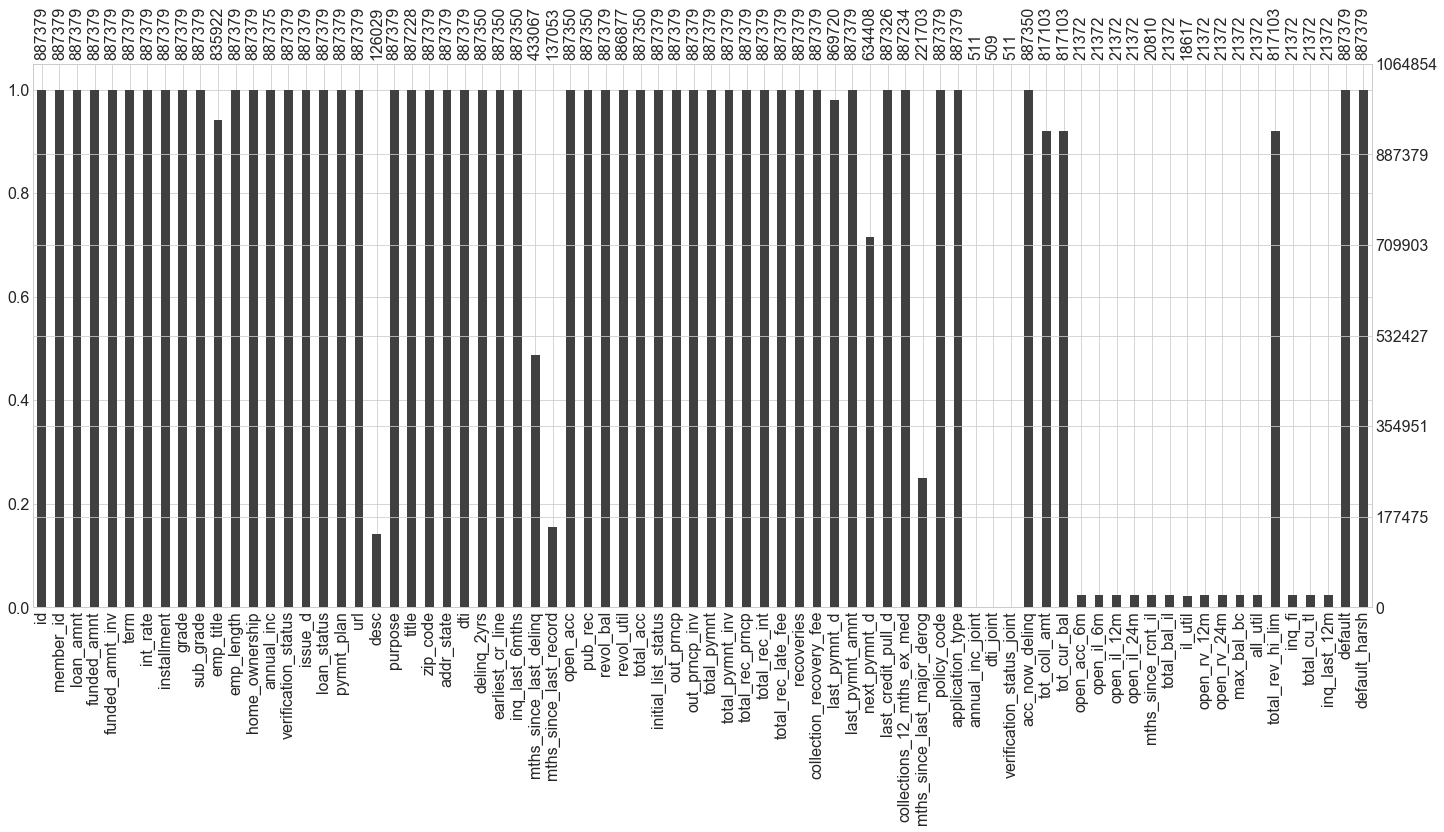

In [37]:
msno_bar_all = msno.bar(data, labels=True, inline=False)

for label in msno_bar_all.axes[0].get_xmajorticklabels() + msno_bar_all.axes[2].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')
    
plt.show()

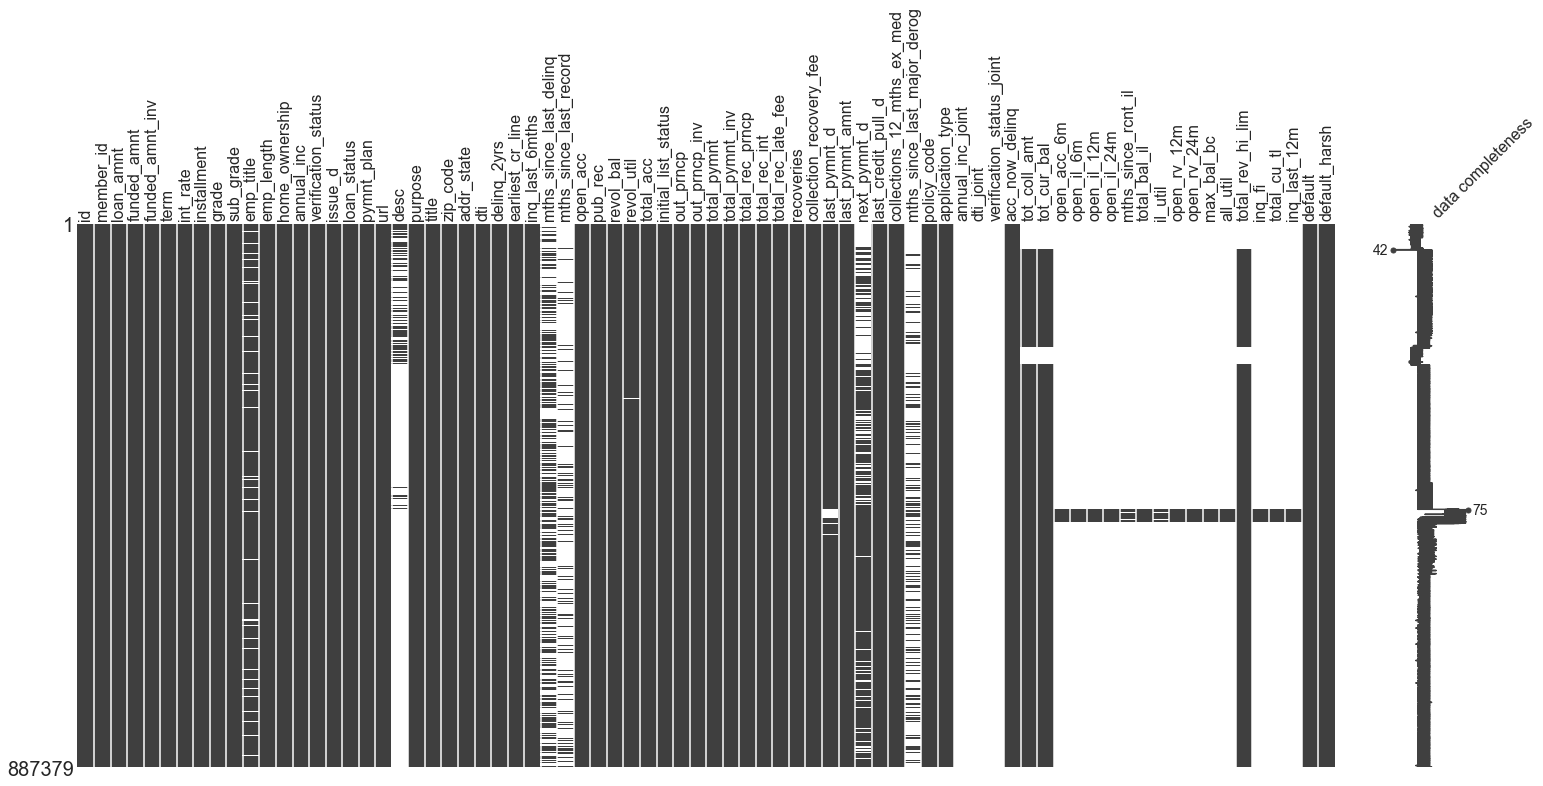

In [44]:
msno_mat_all = msno.matrix(data, labels=True, inline=False)

for label in msno_mat_all.axes[1].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')

plt.show()

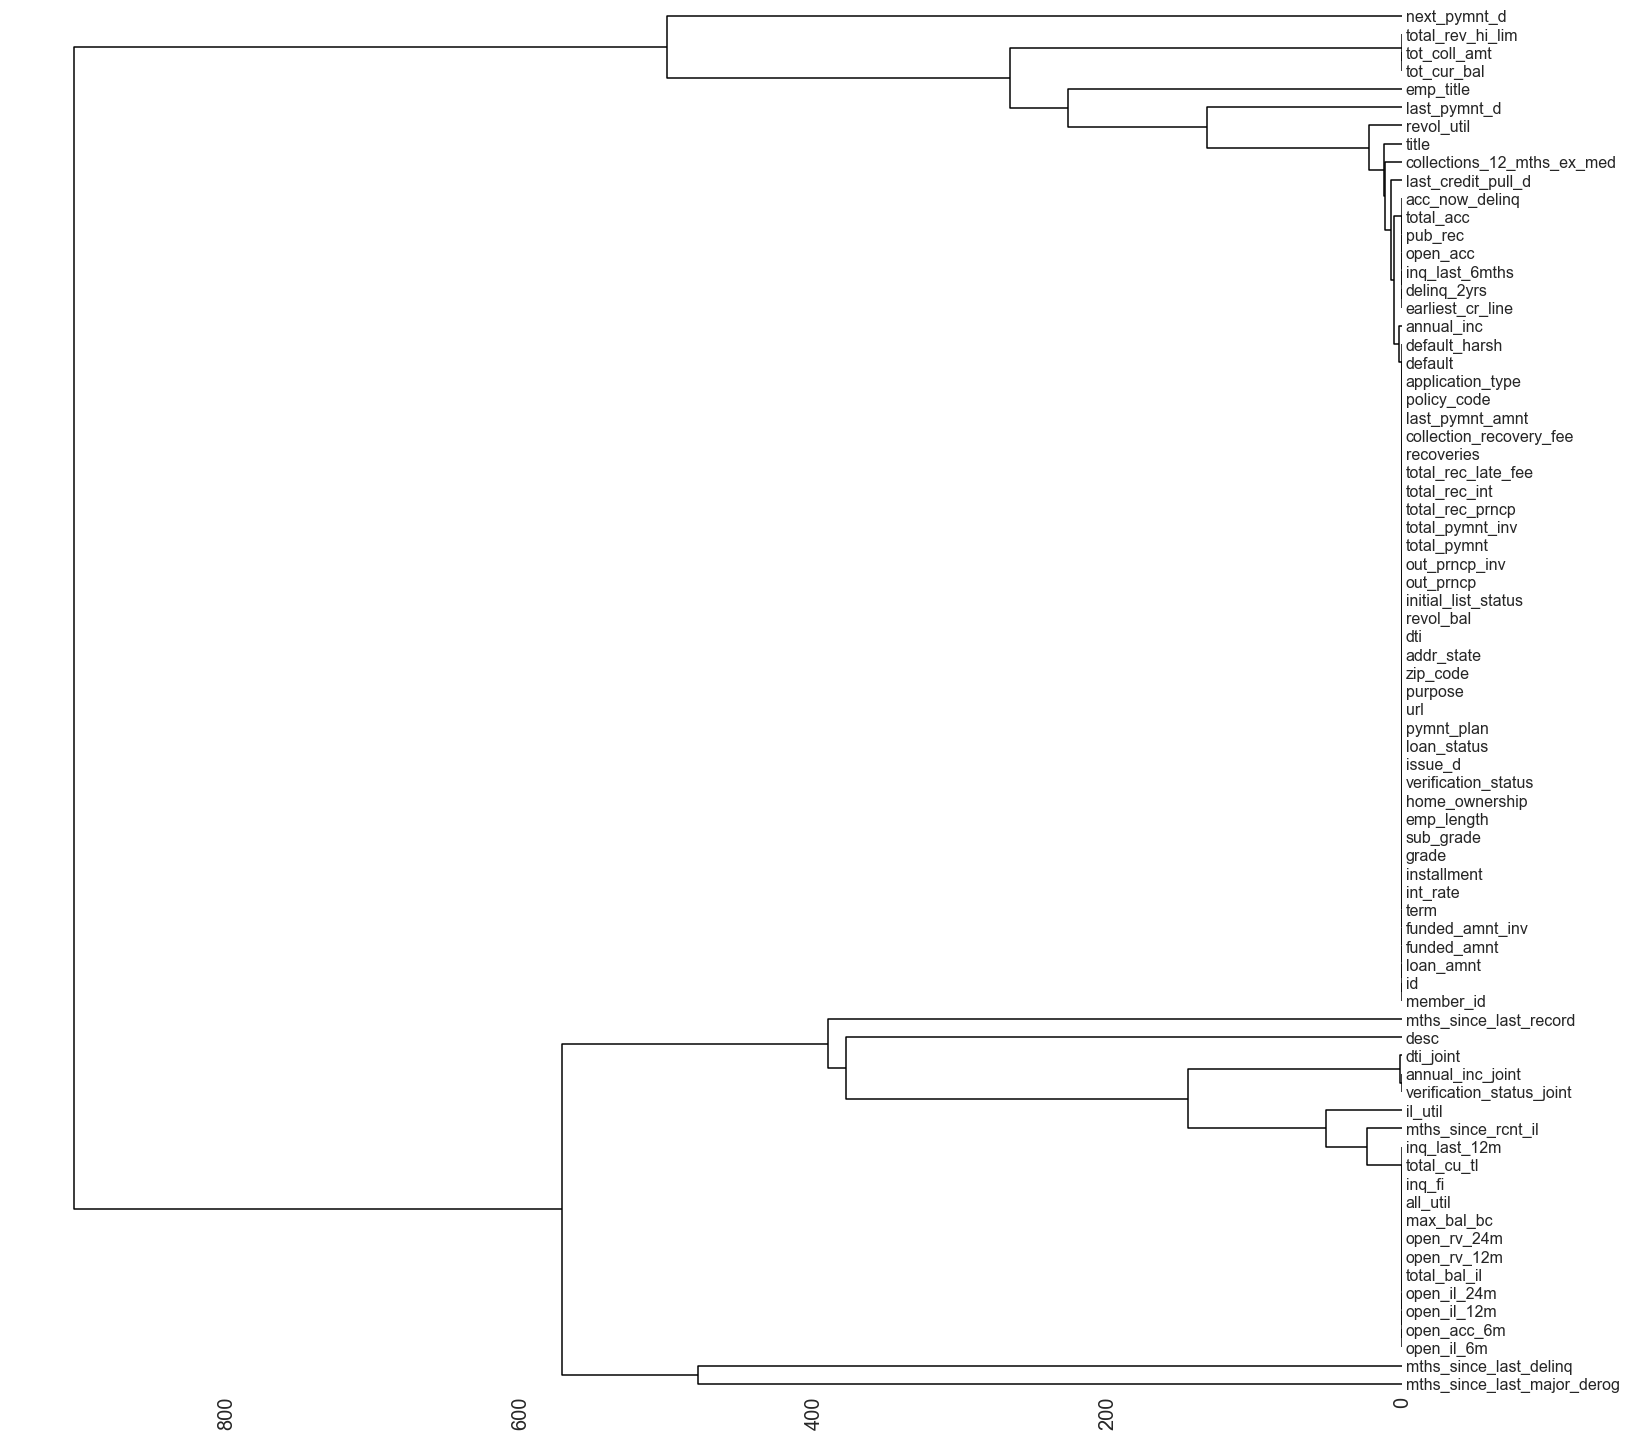

In [45]:
msno_dendro_all = msno.dendrogram(data, inline=False)
for label in msno_dendro_all.axes[0].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')

plt.show()

There are already some clear features will signficiant amounts of missing data. Since this is a lot to process at once, we will split the handling of null values into numerical, categorical, and other.

##### Null Numerical Data

In [46]:
null_num_sum = data[num_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_num_sum, 'null':null_num_sum, '% null': null_num_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
annual_inc,887375,4,0.000005
annual_inc_joint,511,886868,0.999424
loan_amnt,887379,0,0.000000
collection_recovery_fee,887379,0,0.000000
funded_amnt,887379,0,0.000000
funded_amnt_inv,887379,0,0.000000
installment,887379,0,0.000000
int_rate,887379,0,0.000000
last_pymnt_amnt,887379,0,0.000000
out_prncp,887379,0,0.000000


Seems to be a recurring 29 missing values with the features 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'total_acc', and 'acc_now_delinq'. Will see if dropping these fixes all instances:

In [47]:
data.dropna(subset=['open_acc'])[num_cols].isnull().sum()

annual_inc                          0
annual_inc_joint               886839
loan_amnt                           0
collection_recovery_fee             0
funded_amnt                         0
funded_amnt_inv                     0
installment                         0
int_rate                            0
last_pymnt_amnt                     0
out_prncp                           0
out_prncp_inv                       0
recoveries                          0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_int                       0
total_rec_late_fee                  0
total_rec_prncp                     0
collections_12_mths_ex_med        116
delinq_2yrs                         0
dti                                 0
dti_joint                      886841
inq_last_6mths                      0
inq_last_12m                   865978
mths_since_last_delinq         454283
mths_since_last_major_derog    665647
mths_since_last_record         750297
open_acc    

Appears to have eliminated all of the 29 NaN records, as well as the 4 missing annual income.

In [78]:
# Drop records missing open_acc (and those tied to it)
data.dropna(subset=['open_acc'], inplace=True)

Repeating the missigno visualizations for a more 'concise' represenation:

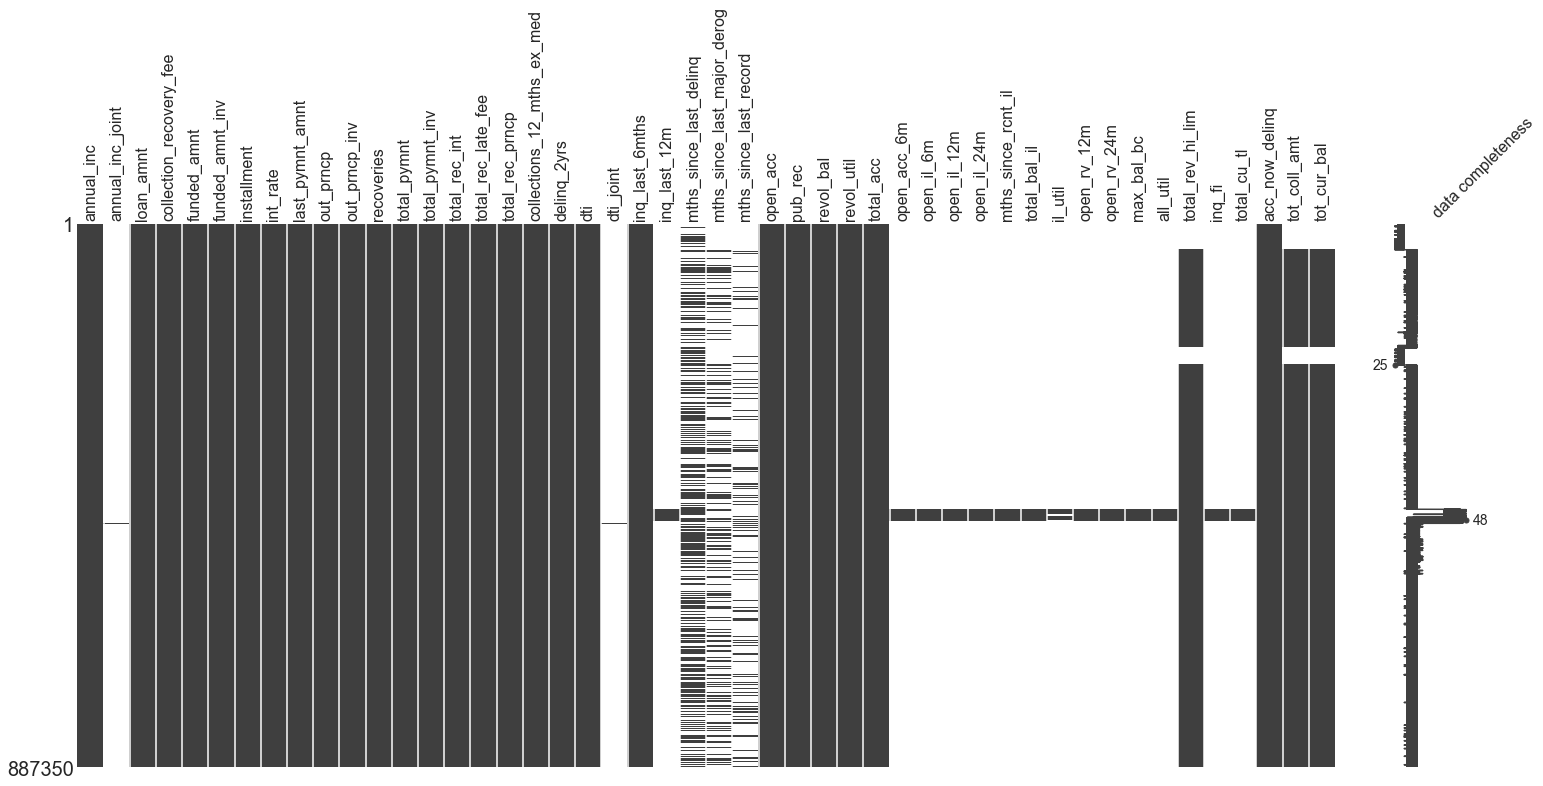

In [51]:
msno_mat_num = msno.matrix(data[num_cols], labels=True, inline=False)
for label in msno_mat_num.axes[1].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')
plt.show()

There is a clear gap in data for the set of 'x months ago' columns. Will check to see if the large areas of this missing time data are tied to older records, since one would expect only records within the past 6-24 months to have these columns filled. Using open_acc_6m as an example (all of these columns should be similar in terms of missing data):

In [57]:
data['open_acc_6m'].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

issue_d
2007       574.0
2008      2393.0
2009      5281.0
2010     12537.0
2011     21721.0
2012     53367.0
2013    134755.0
2014    235628.0
2015    399722.0
Name: open_acc_6m, dtype: float64

In [60]:
data['open_acc_6m'].groupby(data['issue_d'].map(lambda x: x.year)).size() -\
    data['open_acc_6m'].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

issue_d
2007        0.0
2008        0.0
2009        0.0
2010        0.0
2011        0.0
2012        0.0
2013        0.0
2014        0.0
2015    21372.0
Name: open_acc_6m, dtype: float64

It would appear that this data is missing regardless of year, with only some records in 2015 actually having values. We will take a closer look at 2015 to see if a particular part of the year has data:

In [61]:
mask_2015 = data['issue_d'].map(lambda x: x.year) == 2015

data[mask_2015]['open_acc_6m'].groupby(data['issue_d'].map(lambda x: x.month)).size() -\
    data[mask_2015]['open_acc_6m'].isnull().groupby(data['issue_d'].map(lambda x: x.month)).sum()

issue_d
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12    21372.0
Name: open_acc_6m, dtype: float64

Only the loans issued in December 2015 have this data populated. Due to the time sensitivity of this data, there is little that can be done in ways of imputing, so our best option is to simply drop these columns.

In [79]:
num_cols_remove = ['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
                   'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [80]:
data.drop(num_cols_remove, axis=1, inplace=True)

'mnths_since_last_delinq', 'mths_since_last_major_derog', and 'mths_since_last_record' are also quite sparse, which is very likely a result of records which have no delinquency etc. on record.

In [81]:
# Percentage of NaN 'mths_since_last_delinq' explained by 0 delinquencies in past 2 years
((np.isnan(data['mths_since_last_delinq'])) & (data['delinq_2yrs'] == 0)).sum() / (np.isnan(data['mths_since_last_delinq'])).sum()

0.99537072705780316

99.5% of records missing 'mths_since_last_delinq' can be explained by the absence of delinquencies (at least in the past 2 years). As for the remaining 0.5%:

In [82]:
# A look at the records which are still missing the months even though there was a delinqueny in the past 2 yrs
data[(np.isnan(data['mths_since_last_delinq'])) & (data['delinq_2yrs'] > 0)][['mths_since_last_delinq', 'delinq_2yrs']].head()

,mths_since_last_delinq,delinq_2yrs
43607,NaN,1.0
44894,NaN,1.0
44932,NaN,3.0
45181,NaN,1.0
45305,NaN,1.0


In [83]:
# Count of records missing months since last delinquency even though there is a delinquency on record
((np.isnan(data['mths_since_last_delinq'])) & (data['delinq_2yrs'] > 0)).sum()

2103

In [84]:
# Check how many records are missing both 'mths_since_last_delinq' and 'delinq_2yrs'
((np.isnan(data['mths_since_last_delinq'])) & np.isnan(data['delinq_2yrs'])).sum()

0

In [91]:
# Null count by year
data['mths_since_last_delinq'].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

issue_d
2007        10.0
2008       911.0
2009      3536.0
2010      8059.0
2011     14381.0
2012     31401.0
2013     76143.0
2014    115881.0
2015    203961.0
Name: mths_since_last_delinq, dtype: float64

In [94]:
# Not null count by year
mask = ~data['mths_since_last_delinq'].isnull()
data[mask]['mths_since_last_delinq'].groupby(data[mask]['issue_d'].map(lambda x: x.year)).size()

issue_d
2007       564
2008      1482
2009      1745
2010      4478
2011      7340
2012     21966
2013     58612
2014    119747
2015    217133
Name: mths_since_last_delinq, dtype: int64

In [93]:
# Median by year
data['mths_since_last_delinq'].groupby(data['issue_d'].map(lambda x: x.year)).median()

issue_d
2007     0.0
2008    19.0
2009    35.0
2010    35.0
2011    35.0
2012    34.0
2013    31.0
2014    30.0
2015    31.0
Name: mths_since_last_delinq, dtype: float64

Unfortunately there are 2,103 records with delinquencies in the past 2 years but still missing the months since last delinquency. Additionally, the absence of this value seems to be spread across years indiscriminantly. However, if we simplify these months features to binary indicators of 'had delinquency' (etc.) based on the presence of values, we can fill the missing values. Delinquency has the advantage both the 'delinq_2yrs' and 'mths_since_last_delinq' values being available for this purpose. However, 'mths_since_last_major_derog' and 'mths_since_last_record' will have to make do with their own values since there are no other columns available for additional information.

In [95]:
# Create new binary columns for history of delinquency etc.

data['had_delinq'] = data[['mths_since_last_delinq', 'delinq_2yrs']].apply(lambda x: 1 if x['mths_since_last_delinq'] > 0 or x['delinq_2yrs'] > 0 else 0, axis=1)

data['had_major_derog'] = data['mths_since_last_major_derog'].apply(lambda x: 1 if x > 0 else 0)

data['had_record'] = data['mths_since_last_record'].apply(lambda x: 1 if x > 0 else 0)

In [96]:
# Removing old columns
num_cols_remove = ['mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record']
data.drop(num_cols_remove, axis=1, inplace=True)

In [97]:
data[['had_delinq', 'had_major_derog', 'had_record']].isnull().sum()

had_delinq         0
had_major_derog    0
had_record         0
dtype: int64

Moving on, there are the two columns capturing joint borrower info ('annual_inc_joint', 'dti_joint'). It is evident that the missing data is simply for those records with an application type of 'INDIVIDUAL':

In [98]:
((data['application_type'] == 'INDIVIDUAL') & ~(np.isnan(data['annual_inc_joint']) | np.isnan(data['dti_joint']))).sum()

0

There are only a little over 500 records of type 'JOINT', so whilst the impact of removing these records should be minimial it is also fairly straightforward to create a form of merged annual_inc and dti column using the data from both columns for individual and joint (with joint taking priority):

In [99]:
data['annual_inc_merged'] = data.apply(lambda x: x['annual_inc'] if x['application_type'] == 'INDIVIDUAL' else x['annual_inc_joint'], axis=1)

In [100]:
data['dti_merged'] = data.apply(lambda x: x['dti'] if x['application_type'] == 'INDIVIDUAL' else x['dti_joint'], axis=1)

In [101]:
# Remove old joint columns
num_cols_remove = ['annual_inc_joint', 'dti_joint']
data.drop(num_cols_remove, axis=1, inplace=True)

In [102]:
data[data['dti_merged'].isnull() | data['annual_inc_merged'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged
490007,66485064,71210901,15000.0,15000.0,14950.0,60 months,15.41,360.09,D,D1,fork lift driver,10+ years,RENT,44000.0,Verified,2015-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,973xx,OR,29.32,0.0,2003-05-01,0.0,8.0,0.0,17410.0,97.3,39.0,f,14832.53,14783.09,347.25,346.09,167.47,179.78,0.0,0.0,0.0,2016-01-01,360.09,2016-02-01,2016-01-01,0.0,1.0,JOINT,Not Verified,0.0,0.0,30286.0,17900.0,1,1,0,52640.0,NaN
529056,65098814,69635580,18000.0,18000.0,17750.0,36 months,10.99,589.22,B,B4,Automotive Armor Trim Tech,8 years,MORTGAGE,44720.0,Verified,2015-11-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,331xx,FL,26.57,0.0,2000-05-01,0.0,8.0,0.0,11522.0,64.0,13.0,f,17147.37,16909.22,1156.46,1140.40,852.63,303.83,0.0,0.0,0.0,2016-01-01,589.22,2016-02-01,2016-01-01,0.0,1.0,JOINT,Not Verified,0.0,0.0,32301.0,18000.0,1,1,0,109720.0,NaN


In [103]:
# Drop the 2 'JOINT' records missing data
data.dropna(subset=['dti_merged'], inplace=True)

As for the missing data in revol_util (approx. 500 records), we will see if there is any connection to dates again:

In [104]:
data['revol_util'].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

issue_d
2007      3.0
2008     12.0
2009     16.0
2010     21.0
2011      9.0
2012     47.0
2013     78.0
2014    125.0
2015    162.0
Name: revol_util, dtype: float64

It seems to be an issue (albeit sparse) across all years. Although the cost of dropping these 500 rows would be minimal considering the size our dataset, it may be possible to get an estimate for the utilization based off the revolving balance and revolving limit (util = 100 * bal / lim):

In [105]:
# Ignore records that are missing values required for the calculation
revol_mask = ~np.isnan(data['total_rev_hi_lim']) & ~(np.isnan(data['revol_util']))

custom_rev_util_err = abs(100*(data[revol_mask]['revol_bal'] / data[revol_mask]['total_rev_hi_lim']) - data[revol_mask]['revol_util'])
custom_rev_util_err_p =  100*custom_rev_util_err.mean()/data[revol_mask]['revol_util'].mean() # rough approximation for mean percentage error to quickly circumvent issues with div by 0

print('Mean error for manually estimated revol_util = approx. {:.3f} ({:.2f}%)'.format(custom_rev_util_err.mean(), custom_rev_util_err_p))

Mean error for manually estimated revol_util = approx. 0.708 (1.28%)


In [109]:
# Records with both null revol_util and total_rev_hi_lim
(np.isnan(data['total_rev_hi_lim']) & (np.isnan(data['revol_util']))).sum()

92

Similarly, we can repeat the reverse estimatiom process for the missing total_rev_hi_lim values (lim = bal / util):

In [ ]:
# Ignore records that are missing values required for the calculation
revol_mask = ~np.isnan(data['revol_util']) & ~(np.isnan(data['total_rev_hi_lim'])) & (data['revol_bal'] > 0) & (data['revol_util'] > 0)

custom_rev_lim_err = abs((100*data[revol_mask]['revol_bal'] / data[revol_mask]['revol_util']) - data[revol_mask]['total_rev_hi_lim'])
custom_rev_lim_err_p =  100*custom_rev_lim_err.mean()/data[revol_mask]['total_rev_hi_lim'].mean() # rough approximation for mean percentage error to quickly circumvent issues with div by 0

print('Mean error for manually estimated total_rev_hi_lim = approx. {:.3f} ({:.2f}%)'.format(custom_rev_lim_err.mean(), custom_rev_lim_err_p))

In [108]:
data['total_rev_hi_lim'].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

issue_d
2007      574.0
2008     2393.0
2009     5281.0
2010    12537.0
2011    21721.0
2012    27741.0
2013        0.0
2014        0.0
2015        0.0
Name: total_rev_hi_lim, dtype: float64

Whilst the estimate revol_util is fairly accurate, unfortunately the total_rev_hi_lim did not fare as well. Additionally, it would appear the missing data for 'total_rev_hi_lim' is purely for records dating back 2012 and beyond.

Noting the shared pattern of missing data in the earlier missingno matrix for 'total_rev_hi_lim', 'tot_coll_amt' and 'tot_cur_bal', the absence of these values may be commonly explained by the age of the data:

In [111]:
data[['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal']].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

,total_rev_hi_lim,tot_coll_amt,tot_cur_bal
issue_d,,,
2007,574.0,574.0,574.0
2008,2393.0,2393.0,2393.0
2009,5281.0,5281.0,5281.0
2010,12537.0,12537.0,12537.0
2011,21721.0,21721.0,21721.0
2012,27741.0,27741.0,27741.0
2013,0.0,0.0,0.0
2014,0.0,0.0,0.0
2015,0.0,0.0,0.0


In [117]:
# Percentage missing
data[['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal']].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum().divide(data[['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal']].groupby(data['issue_d'].map(lambda x: x.year)).size(), axis=0)

,total_rev_hi_lim,tot_coll_amt,tot_cur_bal
issue_d,,,
2007,1.000000,1.000000,1.000000
2008,1.000000,1.000000,1.000000
2009,1.000000,1.000000,1.000000
2010,1.000000,1.000000,1.000000
2011,1.000000,1.000000,1.000000
2012,0.519816,0.519816,0.519816
2013,0.000000,0.000000,0.000000
2014,0.000000,0.000000,0.000000
2015,0.000000,0.000000,0.000000


It would seem that these values are recorded starting approx. halfway through 2012.

In [120]:
data['total_rev_hi_lim'].isnull().sum()

70247

In [119]:
# Percentage of records missing total_rev_hi_lim (etc.)
data['total_rev_hi_lim'].isnull().sum() / data.shape[0]

0.07916510771422261

For the sake of ensuring we have up-to-date information, it may be best to discard the older records. Fortunately these older records are much less frequent, amounting to only 8% of our total data. Thus, it seems justifiable to remove these and address any concerns regarding out of date / expired information for loans beyond 2012.

In [121]:
data.dropna(subset=['total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt'], inplace=True)

In [136]:
data.groupby(data['issue_d'].map(lambda x: x.year)).size()

issue_d
2012     25626
2013    134755
2014    235628
2015    421092
dtype: int64

Returning to the missing revol_util values:

In [124]:
(np.isnan(data['revol_util'])).sum()

381

In [129]:
np.isnan(data['total_rev_hi_lim']).sum()

0

In [130]:
np.isnan(data['revol_bal']).sum()

0

There are now zero records missing revol_bal and total_rev_hi_lim, so we can now proceed with our estimations of revol_util without issue:

In [131]:
def get_rev_util(row):
    if not np.isnan(row['revol_util']):
        # Preserve existing data
        val = row['revol_util']
    elif row['revol_bal'] == 0 and row['total_rev_hi_lim'] == 0:
        # If everything is 0, util should also be 0
        val = 0
    elif row['total_rev_hi_lim'] != 0 and not np.isnan(row['total_rev_hi_lim']):
        # Estimate
        val = 100*row['revol_bal'] / row['total_rev_hi_lim']
    else:
        # If limit = 0 but there is a balance, assume util = 100%
        val = 100
    
    return val

In [132]:
rev_cols = ['revol_util', 'revol_bal', 'total_rev_hi_lim']

data['rev_util_custom'] = data[rev_cols].apply(get_rev_util, axis=1)

In [133]:
data['rev_util_custom'].isnull().sum()

0

The final numerical column with missing data is collections_12_mths_ex_med:

In [139]:
# Percentage of records with collections_12_mths_ex_med
data['collections_12_mths_ex_med'].isnull().sum()

0

It would appear our elimination of older data also took care of these missing values.

##### Null Categorical Data

Taking a look at the categorical data, we can see that the verification status for joint borrowers is the only field with missing data:

In [140]:
null_cat_sum = data[cat_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_cat_sum, 'null':null_cat_sum, '% null': null_cat_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
emp_length,817101,0,0.000000
home_ownership,817101,0,0.000000
verification_status,817101,0,0.000000
verification_status_joint,509,816592,0.999377
zip_code,817101,0,0.000000
application_type,817101,0,0.000000
grade,817101,0,0.000000
initial_list_status,817101,0,0.000000
loan_status,817101,0,0.000000
policy_code,817101,0,0.000000


This ties back to the same issue with only records of application type 'JOINT' having this field populated:

In [141]:
# Nymber of null verification_status_joint records of type 'JOINT'
(data['verification_status_joint'].isnull() & (data['application_type'] == 'JOINT')).sum()

0

To fix this we can simply take the same approach of creating a new merged column which combines both the individual and joint values, with the joint value taking priority:

In [142]:
data['verification_status_merged'] = data[['verification_status', 'verification_status_joint']].apply(
                                            lambda x: x['verification_status'] if pd.isnull(x['verification_status_joint'])
                                            else x['verification_status_joint'],
                                            axis=1)

In [143]:
data['verification_status_merged'].isnull().sum()

0

In [144]:
# Drop old verificatin status column
data.drop('verification_status_joint', axis=1, inplace=True)

##### Null Date Data

In [145]:
null_date_sum = data[date_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_date_sum, 'null':null_date_sum, '% null': null_date_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
issue_d,817101,0,0.000000
last_credit_pull_d,817052,49,0.000060
last_pymnt_d,799556,17545,0.021472
next_pymnt_d,627838,189263,0.231627
earliest_cr_line,817101,0,0.000000


The columns for last and next payment date are only meaningul for loans that are still in effect. Consequently, it is best to simply remove these columns since they do not provide a fair means of comparison or any useful insight between active loans and those that have been resolved in years past.

In [146]:
data.drop(['last_pymnt_d', 'next_pymnt_d'], axis=1, inplace=True)

As for last_credit_pull_d, we will see if there is any obvious correlation to the other date fields:

In [147]:
data[(~pd.isnull(data['last_credit_pull_d']))][['earliest_cr_line', 'issue_d', 'last_credit_pull_d']]

,earliest_cr_line,issue_d,last_credit_pull_d
42535,1986-10-01,2013-12-01,2015-12-01
42536,2007-01-01,2013-12-01,2016-01-01
42537,1994-03-01,2013-12-01,2016-01-01
42538,1998-10-01,2013-12-01,2016-01-01
42539,1998-03-01,2013-12-01,2016-01-01
42540,1997-11-01,2013-12-01,2016-01-01
42541,1988-06-01,2013-12-01,2016-01-01
42542,2010-10-01,2013-12-01,2016-01-01
42543,1989-10-01,2013-12-01,2016-01-01
42544,1991-05-01,2013-12-01,2016-01-01


In [148]:
(data['last_credit_pull_d'] > data['issue_d']).sum() / data.shape[0]

0.99646188170128291

It would appear that almost all records have a last credit pull date after the issue_d, however we will need to check how much varation there is between the two if we are going to use this for filling values:

In [153]:
date_diff = [(credit_pull_d.date() - issue_d.date()).days for issue_d, credit_pull_d in zip(data.dropna()['issue_d'], data.dropna()['last_credit_pull_d'])]

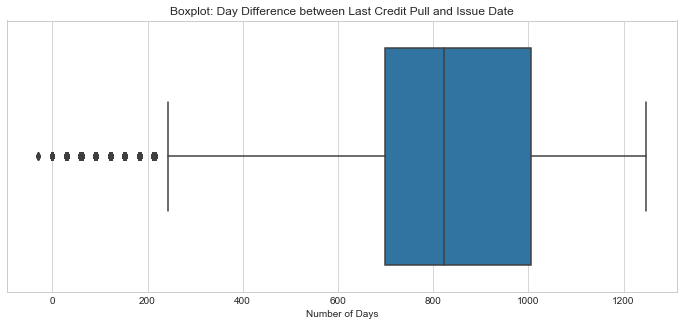

In [154]:
plt.figure(figsize=(12,5))

sns.boxplot(date_diff)

plt.title('Boxplot: Day Difference between Last Credit Pull and Issue Date')
plt.xlabel('Number of Days')

plt.show()

With a median difference of 800 days, it is evident that we are encountering the anticipated time sensitivity issue with dates: older loans on file are still updated with more recent credit pull dates and consequently don't accurately reflect the situation at the time the loan instantiated. Consequently it would be best to discard this column for analysis.

In [155]:
data.drop('last_credit_pull_d', axis=1, inplace=True)

The two remaining dates, 'earliest_cr_line' and 'issue_d' should be absolute, i.e. they never get updated during the course of the loan and consequently can still act as a valid snapshot of conditions at the time the loan was instantiated. It is worth noting that 'earliest_cr_line', if used for analysis, should likely be adjusted for its relative time difference from the issue date, since this will give a more accurate picture of the loans/borrowers situation at the time the loan was requested.

In [156]:
data['earliest_cr_line_td'] = [(cr.date() - issue_d.date()).days for issue_d, cr in zip(data['issue_d'], data['earliest_cr_line'])]

In [157]:
data['earliest_cr_line_td'].isnull().sum()

0

##### Text Data

In [158]:
data[text_cols].isnull().sum()

url               0
emp_title     47121
desc         737406
title           139
dtype: int64

The text data identified, such as the description of their employment, loan purpose, etc. is going to be limited since these fields were all entered by the applicants without any strict categories or tags. For example, taking a look at the 'title' of loans:

In [159]:
data['title'].value_counts()

Debt consolidation                          412182
Credit card refinancing                     163987
Home improvement                             39909
Other                                        31589
Major purchase                               11977
Debt Consolidation                           11187
Medical expenses                              6638
Business                                      6529
Car financing                                 5533
Consolidation                                 4295
Moving and relocation                         3905
Vacation                                      3695
debt consolidation                            3656
Home buying                                   2348
consolidation                                 1714
Credit Card Consolidation                     1692
Debt Consolidation Loan                       1335
Consolidation Loan                            1310
Home Improvement                              1126
Personal Loan                  

This information is captured much more concisely in the 'purpose' column:

In [160]:
data['purpose'].value_counts()

debt_consolidation    489195
credit_card           195527
home_improvement       46956
other                  36707
major_purchase         14143
medical                 7457
small_business          7451
car                     6666
moving                  4549
vacation                4140
house                   3001
wedding                  876
renewable_energy         432
educational                1
Name: purpose, dtype: int64

The same issue can be seen for 'emp_title':

In [161]:
data['emp_title'].value_counts()

Teacher                                     13468
Manager                                     11240
Registered Nurse                             5525
Owner                                        5376
RN                                           5355
Supervisor                                   4983
Sales                                        4212
Project Manager                              3988
Driver                                       3568
Office Manager                               3510
General Manager                              3178
Director                                     3156
manager                                      3138
teacher                                      2925
owner                                        2849
Engineer                                     2671
President                                    2598
driver                                       2429
Vice President                               2351
Attorney                                     2136


The variation / inconsistency in data is obviously even worse for description, and so for the sake of simplicity and the effort it would take to identify and split these text values into appropriate categories, we will simply remove these columns from the data:

In [162]:
text_cols

['url', 'emp_title', 'desc', 'title']

In [163]:
data.drop(text_cols, axis=1, inplace=True)

Whilst it is a shame to lose all information regarding the employment title, one would hope that at least the annual income provides equavelent insight.

##### Final Review of Null Data

In [164]:
data.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                    381
total_acc                       0
initial_list_s

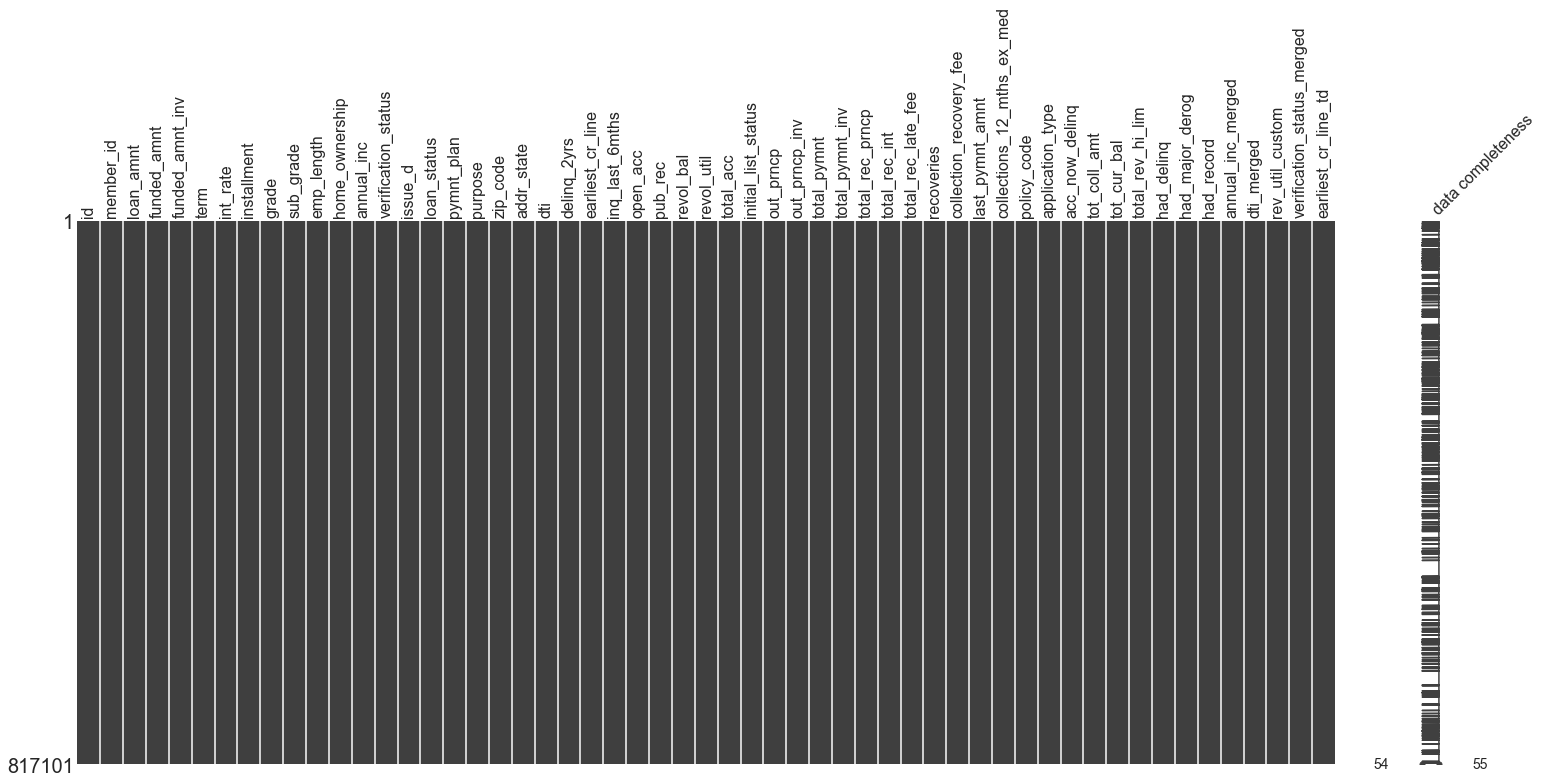

In [165]:
msno_mat_cleaned = msno.matrix(data, labels=True, inline=False)
for label in msno_mat_cleaned.axes[1].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')
plt.show()

The data set is clearly looking a lot more complete, with the only remaining issues being the revol_util column, which has an estimate equivelent if those records are to be kept.

### ID Columns

We have not addressed the ID columns yet. For the purpose of actually modelling itself these are obviously useless, but it may be worth preserving at least the loan ID for consistency in potential joins between different encodings tables.

In [166]:
# Check if all records have a unique ID
data['id'].duplicated().sum()

0

In [167]:
# Set id column as the new index
data.set_index('id', drop=True, inplace=True)

In [168]:
# Drop member_id column
data.drop('member_id', axis=1, inplace=True)

In [169]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged,rev_util_custom,verification_status_merged,earliest_cr_line_td
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10149342,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,10+ years,OWN,55000.0,Verified,2013-12-01,Current,n,debt_consolidation,481xx,MI,22.87,0.0,1986-10-01,0.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0,0,0,0,55000.0,22.87,61.2,Verified,-9923
10159584,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,1 year,RENT,26000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,927xx,CA,25.12,0.0,2007-01-01,0.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0,0,0,0,26000.0,25.12,52.8,Not Verified,-2526
10159498,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,060xx,CT,14.05,0.0,1994-03-01,1.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,1,0,0,105000.0,14.05,21.6,Not Verified,-7215
10139658,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,871xx,NM,16.94,0.0,1998-10-01,0.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,1,1,1,40000.0,16.94,68.8,Source Verified,-5540
10159548,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,63000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,334xx,FL,16.51,0.0,1998-03-01,0.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,1,1,0,63000.0,16.51,74.2,Not Verified,-5754


### Removing Current Loans

Current loans should be discarded from anaylsis since there is no way of categorizing them as defaulted or fully paid. Additionally, for the purposes of regression they will be misleading since many current loans will appear to be at a loss even if they are on track to being fully paid.

In [170]:
# Retain copy of current loan data

mask_current_loans = data['loan_status'].isin(['Current', 'Issued', 'In Grace Period'])

data_current = data[mask_current_loans].copy()

f = 'loan_current.p'
d = ['..','data','interim']
fp = path.join(*d,f)

with open(fp, 'wb') as file:
    pickle.dump(data_current, file)

In [171]:
data = data[~mask_current_loans].copy()

In [172]:
data['loan_status'].value_counts()

Fully Paid            154034
Charged Off            35229
Late (31-120 days)     11470
Late (16-30 days)       2330
Default                 1201
Name: loan_status, dtype: int64

Note that the two 'Late' statuses have been kept. This is to allow for flexibility in how harshly a default is categorized. During analysis it will have to be decided if keeping these values benefits both the classification and regression models.

### Saving Cleaned Dataframe

In [186]:
data_clean = data

In [187]:
data_clean.shape[0]

204264

In [188]:
# Create pickle file for raw data

f = 'loan_clean.p'
d = ['..','data','interim']
fp = path.join(*d,f)

with open(fp, 'wb') as file:
    pickle.dump(data_clean, file)

In [178]:
# Open pickle file with raw data

f = 'loan_clean.p'
d = ['..','data','interim']
fp = path.join(*d,f)

with open(fp, 'rb') as file:
    data_clean = pickle.load(file)

In [177]:
data_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged,rev_util_custom,verification_status_merged,earliest_cr_line_td
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10139658,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,871xx,NM,16.94,0.0,1998-10-01,0.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,1,1,1,40000.0,16.94,68.8,Source Verified,-5540
10179520,3000.0,3000.0,3000.0,36 months,12.85,100.87,B,B4,10+ years,RENT,25000.0,Verified,2013-12-01,Fully Paid,n,debt_consolidation,322xx,FL,24.68,0.0,1991-05-01,0.0,5.0,2.0,2875.0,54.2,26.0,f,0.00,0.00,3181.532981,3181.53,3000.00,181.53,0.0,0.0,0.0,2677.23,0.0,1.0,INDIVIDUAL,0.0,154.0,19530.0,5300.0,1,1,1,25000.0,24.68,54.2,Verified,-8250
10149577,28000.0,28000.0,28000.0,36 months,7.62,872.52,A,A3,5 years,MORTGAGE,325000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,945xx,CA,18.55,0.0,1994-11-01,1.0,15.0,0.0,29581.0,54.6,31.0,w,0.00,0.00,29150.980000,29150.98,28000.00,1150.98,0.0,0.0,0.0,23915.86,0.0,1.0,INDIVIDUAL,0.0,0.0,799592.0,54200.0,0,0,0,325000.0,18.55,54.6,Source Verified,-6970
10127816,24000.0,24000.0,24000.0,36 months,13.53,814.80,B,B5,10+ years,MORTGAGE,100000.0,Verified,2013-12-01,Fully Paid,n,credit_card,493xx,MI,22.18,0.0,1989-01-01,0.0,14.0,0.0,21617.0,76.7,39.0,w,0.00,0.00,28652.210000,28652.21,24000.00,4652.21,0.0,0.0,0.0,10726.61,0.0,1.0,INDIVIDUAL,0.0,539.0,199834.0,28200.0,0,0,0,100000.0,22.18,76.7,Verified,-9100
10149566,8000.0,8000.0,8000.0,36 months,10.99,261.88,B,B2,2 years,MORTGAGE,33000.0,Not Verified,2013-12-01,Late (31-120 days),n,debt_consolidation,800xx,CO,15.75,0.0,1991-07-01,1.0,9.0,1.0,7203.0,34.6,16.0,f,4145.19,4145.19,4990.030000,4990.03,3854.81,1120.22,15.0,0.0,0.0,276.88,0.0,1.0,INDIVIDUAL,0.0,0.0,15949.0,20800.0,0,0,1,33000.0,15.75,34.6,Not Verified,-8189


### Key Take-Aways:

##### Dropped Columns:

- ['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']: Only had data for December 2015</b>: 
- ['last_pymnt_d', 'next_pymnt_d']: This time sensitive data cannot be utilized as a means of comparison between loans since older loans will obviously have older dates. Additionally, this data is only known once a loan begins its term, whereas our analysis will be focused on evaluating newly issued loans.
- ['last_credit_pull_d']: date value is not static from the point of loan issuing, and consequently cannot be used for analysis.
- ['url', 'emp_title', 'desc', 'title']: Text columns with inconsistent values. Cannot be utilized without extensive text analysis beyond the scope of this project.
- ['member_id']: ID column; no use.

##### Dropped Rows:

- ANY null values: ['delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'open_acc', 'total_acc', 'acc_now_delinq'] (29 records)
- ANY null values: 'annual_inc' (4 records)
- ANY null values: ['dti', 'dti_joint', dti_merged'] (2 records)
- ANY null values: ['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal'] (70,276 records; data prior to approx. mid 2012)
- ['loan_status'] == 'Current', 'Issued', 'In Grace Period'. Active loans cannot be used for analysis, since their ultimate default status and total return are unknown.

##### Modified/Replaced Columns:

- ['loan_status']: "out of policy" statuses simplified to respective simple charged off / fully paid status.
- ['dti_joint']: replaced by 'dti_merged'
- ['annual_inc_joint']: replaced by 'annual_inc_merged'
- ['mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last\_record']: replaced by respective 'had\_...' binary column.
- ['verification_status_joint']: replaced by 'verification_status_merged'.
- ['id']: set as index.

##### New Columns:

- ['default']: loan status of default, charged off
- ['default_harsh']: loan status of default, charged off, late
- ['dti_merged']: combined 'dti' and 'dti_joint'. If value for joint exists, it takes priority over regular value.
- ['annual_inc_merged']: combined 'annual_inc' and 'annual_inc_joint'. If value for joint exists, it takes priority over regular value.
- ['had_delinq', 'had_major_derog', 'had_record']: binary columns indicating if borrower had record of delinquency etc. in the past. Replaced 'months since...' equivalent columns.
- ['revol_util_custom']: estimate of revol_util using util = revol_bal / total_rev_hi_lim.
- ['verification_status_merged']: combined 'verification_status' and 'verification_status_joint'. If value for joint exists, it takes priority over regular value.

##### Other Notes:

- ['revol_util']: 381 records with missing values. 'revol_util_custom' has been calculated as an alternative, otherwise these records will need to be dropped.
- ['loan_status']: Records with values of 'Late...' have been kept. These should only be used in tandem with the 'default_harsh' column. If regular 'default' is used for analysis, all 'Late...' status instances should be dropped.

### Next Steps:

1. EDA
2. MVP / Benchmark Modeling: Classification of Defaulted Loans
3. MVP / Benchmark Modeling: Regression of Loan Profit / Return